In [1]:
#Working With DataFrames
import pandas as pd
import numpy as np

#Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data preparation 

In [2]:
df=pd.read_csv('Resources/data.csv')
df.head(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2.0,Nibble,3,299,0,1.0,1,7,0,1,...,1,1,100.0,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2.0,No Name Yet,1,265,0,1.0,1,2,0,2,...,1,1,0.0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1.0,Brisco,1,307,0,1.0,2,7,0,2,...,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,1.0,Miko,4,307,0,2.0,1,2,0,2,...,1,1,150.0,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,1.0,Hunter,1,307,0,1.0,1,0,0,2,...,1,1,0.0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2


The following are the data fields corresponding to our project, which we obtained on Kaggle.com:
PetID - Unique hash ID of pet profile 
AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.

Type - Type of animal (1 = Dog, 2 = Cat)
Name - Name of pet (Empty if not named)
Age - Age of pet when listed, in months
Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
Quantity - Number of pets represented in profile
Fee - Adoption fee (0 = Free)
State - State location in Malaysia (Refer to StateLabels dictionary)
RescuerID - Unique hash ID of rescuer
VideoAmt - Total uploaded videos for this pet
PhotoAmt - Total uploaded photos for this pet
Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

In [3]:
#To make headers consistent and help with regressions etc. , cleaning them up to all be lower case
df.columns=[i.lower() for i in df.columns]

In [4]:
df.head(5)

,type,name,age,breed1,breed2,gender,color1,color2,color3,maturitysize,...,health,quantity,fee,state,rescuerid,videoamt,description,petid,photoamt,adoptionspeed
0,2.0,Nibble,3,299,0,1.0,1,7,0,1,...,1,1,100.0,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2.0,No Name Yet,1,265,0,1.0,1,2,0,2,...,1,1,0.0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1.0,Brisco,1,307,0,1.0,2,7,0,2,...,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,1.0,Miko,4,307,0,2.0,1,2,0,2,...,1,1,150.0,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,1.0,Hunter,1,307,0,1.0,1,0,0,2,...,1,1,0.0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2


In [5]:
df.shape

(14993, 24)

In [6]:
#df['name'].isna().sum()/df.shape[0]

In [7]:
#find Nah values in a column 
df.isna().sum()

type                2
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 1
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

In [8]:
df['fee'].value_counts()/len(df['fee'])

0.0      0.844594
50.0     0.031215
100.0    0.027213
200.0    0.014607
150.0    0.010805
           ...   
499.0    0.000067
75.0     0.000067
72.0     0.000067
108.0    0.000067
599.0    0.000067
Name: fee, Length: 74, dtype: float64

In [9]:
#Nearly 85% of the ["fee"] values are 0, so we replace null values with the (overwhelmingly popular) mode.
df['fee'].fillna(0,inplace=True)
df.isna().sum()

type                2
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 0
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

In [10]:
 
df.columns

Index(['type', 'name', 'age', 'breed1', 'breed2', 'gender', 'color1', 'color2',
       'color3', 'maturitysize', 'furlength', 'vaccinated', 'dewormed',
       'sterilized', 'health', 'quantity', 'fee', 'state', 'rescuerid',
       'videoamt', 'description', 'petid', 'photoamt', 'adoptionspeed'],
      dtype='object')

In [11]:
#drop undesired columns that are evidently not helpful for predicting pet adoption speed such as petID(Unique hash ID of pet profile )
droped_df = df.drop('petid',axis=1).dropna()


In [12]:
droped_df.shape

(13720, 23)

In [13]:
#type 1 is a dog and type 2 is a cat. we want to see if we could figure the type for rows with Nah type, by analyzing the description string.
#https://intellipaat.com/community/27165/how-to-select-rows-with-nan-in-particular-column
#locate rows with nah type
df.loc[df['type'].isnull()]

,type,name,age,breed1,breed2,gender,color1,color2,color3,maturitysize,...,health,quantity,fee,state,rescuerid,videoamt,description,petid,photoamt,adoptionspeed
14983,NaN,Alger,3,307,0,1.0,1,2,7,2,...,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,He is very intelligent and cute. Fluffy and lo...,cca88204d,7,2
14986,NaN,Pets + Strays : BlueEyed BlackWhite,1,266,0,2.0,5,6,7,2,...,1,1,0.0,41401,90569c3f7cb0af35cba5dac82c0ac9d7,0,1 month old white + grey kitten for adoption n...,36e7f8d83,1,3


In [14]:
#by looking at the description, row 14986 is a kitten 
df["description"].loc[df['type'].isnull()]

14983    He is very intelligent and cute. Fluffy and lo...
14986    1 month old white + grey kitten for adoption n...
Name: description, dtype: object

In [15]:
#fill index=14986 type as 2 
df['type'].iloc[ 14986]=2

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
#df.loc[df['gender'].isnull()]

In [17]:
#df['description'].iloc[14990]

In [18]:
#df['description'].iloc[14992]

In [19]:
df = df.drop('name',axis=1).dropna()
df.shape

(14978, 23)

In [20]:
type_percentage = list(df['type'].value_counts()/len(df['type']))

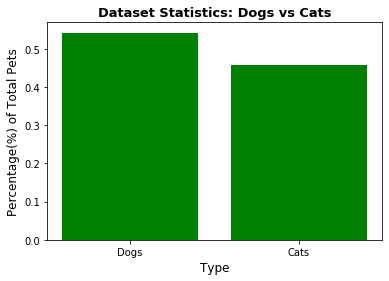

In [21]:
x=['Dogs','Cats']
y=type_percentage
plt.bar(x,y,color='g')
plt.title('Dataset Statistics: Dogs vs Cats',fontsize=13,fontweight='bold')
plt.xlabel('Type',fontsize=12)
plt.ylabel('Percentage(%) of Total Pets',fontsize=12)
plt.show()

Text(0, 0.5, 'Adoption Rate')

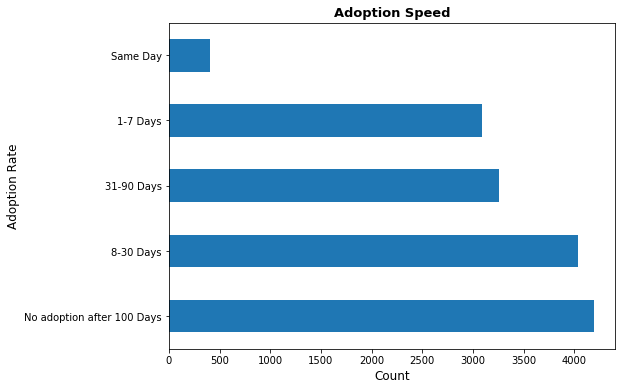

In [22]:
df['adoptionspeed'].value_counts().rename(
    {0:'Same Day',
     1:'1-7 Days',
     2:'8-30 Days',
     3:'31-90 Days',
     4:'No adoption after 100 Days'}).plot(kind='barh',figsize=(8,6))
plt.title('Adoption Speed', fontsize=13,fontweight='bold')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Adoption Rate',fontsize=12)

In [23]:
#4:'No adoption after 100 Days'
df['adoptionspeed'].value_counts()

4    4193
2    4031
3    3256
1    3088
0     410
Name: adoptionspeed, dtype: int64

In [24]:
percentage_noadopt = round((len(df.loc[df['adoptionspeed']==4])/len(df))*100)
print(f'nearly {percentage_noadopt} of all pets in our dataset were not adopted after 100 days.')

nearly 28 of all pets in our dataset were not adopted after 100 days.


In [25]:
#Is the adoption speed better (with a corresponding smaller value) for dogs or cats?
df.groupby(['type']).agg({'adoptionspeed':'mean'})

,adoptionspeed
type,
1.0,2.615233
2.0,2.399066


This data shows us that cats are more likely to be adopted quicker than dogs. We found that 28% of all pets are not adopted after 100 days. We decided to filter on several characteristics to see if we could deduce some characteristics which help make pets more likely to be adopted. We filtered on pets who possess all of the following characteristics at the same time - are vaccinated, are dewormed, are sterilized, are either healthy or have only a minor injury, have no adoption fee, and age of less than 1 year.

In [26]:
vaccinated_list=[1]
dewormed_list=[1]
sterilized_list=[1]
health_list=[1,2]
fee_list=[0]
age_list=[1,2,3,4,5,6,7,8,9,10,11,12]

df_filter_adj=df.loc[df['vaccinated'].isin(vaccinated_list)&df['dewormed'].isin(dewormed_list)&
       df['sterilized'].isin(sterilized_list)&df['health'].isin(health_list)&
       df['fee'].isin(fee_list)&df['age'].isin(age_list)]
df_filter_adj['adoptionspeed'].value_counts()/len(df_filter_adj)

4    0.398974
3    0.269744
2    0.220513
1    0.087179
0    0.023590
Name: adoptionspeed, dtype: float64

Surprisingly, 40% of our sliced dataset were not adopted

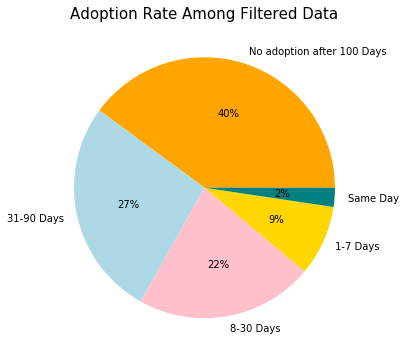

['No adoption after 100 Days',
 '31-90 Days',
 '8-30 Days',
 '1-7 Days',
 'Same Day']

In [27]:
labels=['No adoption after 100 Days','31-90 Days','8-30 Days','1-7 Days','Same Day']
sizes=df_filter_adj['adoptionspeed'].value_counts().values
colors=['orange','lightblue','pink','gold','teal']
explode=[0,0,0,0,0]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct= '%1.0f%%')
plt.title('Adoption Rate Among Filtered Data',fontsize=15)
plt.show()
labels

Text(0, 0.5, 'Distribution')

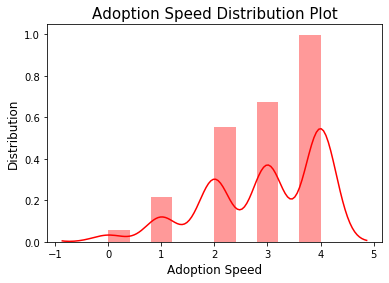

In [28]:
sns.distplot(df_filter_adj['adoptionspeed'],color = "red")
plt.title('Adoption Speed Distribution Plot',fontsize=15)
plt.xlabel('Adoption Speed',fontsize=12)
plt.ylabel('Distribution',fontsize=12)

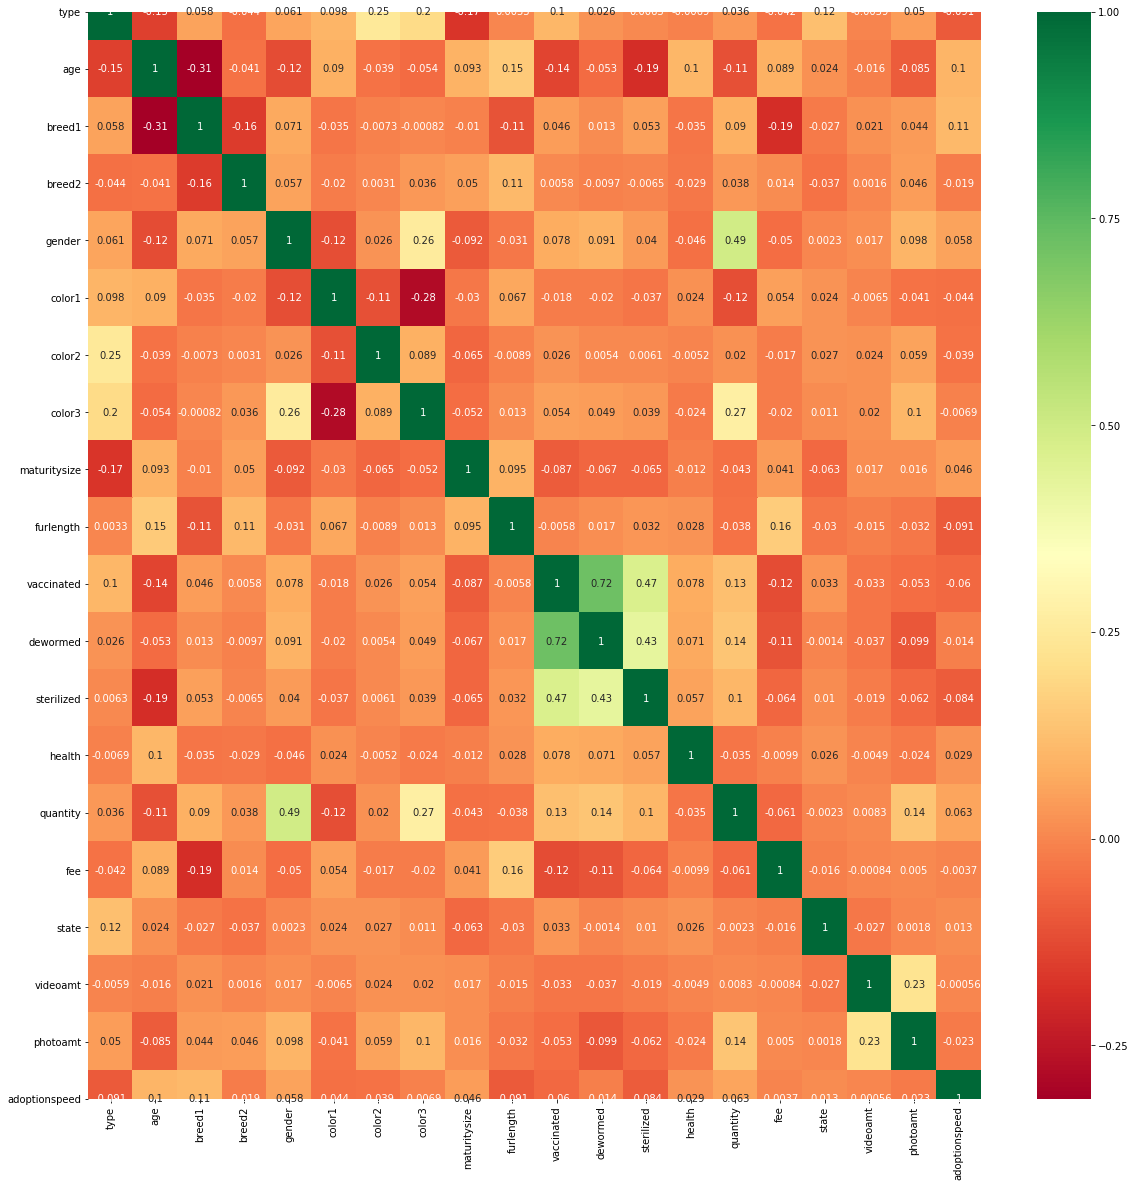

In [29]:
# by looking at correlation matrix, it will give us ideas about possible features 
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Build Predicting Models 

In [43]:
#Machine Learning Packages
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## logistic regression


In [40]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X = X_train,y=y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# Predict!
y_predicted = logisticRegression.predict(X_test)
print(y_predicted)

[0 1 1 ... 1 0 1]


In [42]:
logisticRegression.score(X_test,y_test)

0.6008010680907877

naive model baseline is 60%. logistic regresssion score does not pass the baseline. so logistic regression wouldn't be a proper algorithm for us

# KNeighborsClassifier

k: 1, Train/Test Score: 0.998/0.577
k: 3, Train/Test Score: 0.775/0.582
k: 5, Train/Test Score: 0.724/0.591
k: 7, Train/Test Score: 0.699/0.595
k: 9, Train/Test Score: 0.680/0.590
k: 11, Train/Test Score: 0.663/0.595
k: 13, Train/Test Score: 0.655/0.594
k: 15, Train/Test Score: 0.650/0.595
k: 17, Train/Test Score: 0.644/0.594
k: 19, Train/Test Score: 0.641/0.594
k: 21, Train/Test Score: 0.637/0.593
k: 23, Train/Test Score: 0.635/0.597
k: 25, Train/Test Score: 0.630/0.597
k: 27, Train/Test Score: 0.629/0.597
k: 29, Train/Test Score: 0.624/0.598


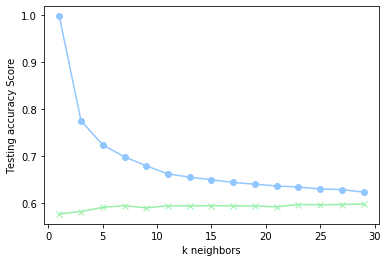

In [44]:
train_scores = []
test_scores = []
for k in range(1,30, 2):
    knn = knnc(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1,30, 2), train_scores, marker='o')
plt.plot(range(1,30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('K neighbors.png')
plt.show()

In [45]:
 # Note that k: 23 seems to be the best choice for this dataset
knn = knnc(n_neighbors=23)
knn.fit(X_train, y_train)
print('k=23 Test Acc: %.3f' % knn.score(X_test, y_test))

k=23 Test Acc: 0.597


KNeighborsClassifier score doesn't pass the naive model baseline either. Thus, it's not ideal for us to use KNeighborsClassifier 

## random forest classifier


In [31]:
#put adoption speed in two categorical buckets 
df['adoption_indicator'] = np.where(df['adoptionspeed']>2,0,1)

In [32]:
# get dummies on possible categorical features 
df_dummied = pd.get_dummies(df, columns=['maturitysize', 'vaccinated', 'dewormed', 'health', 'color1'], drop_first=True)
df_dummied.head()

,type,age,breed1,breed2,gender,color2,color3,furlength,sterilized,quantity,...,dewormed_2,dewormed_3,health_2,health_3,color1_2,color1_3,color1_4,color1_5,color1_6,color1_7
0,2.0,3,299,0,1.0,7,0,1,2,1,...,1,0,0,0,0,0,0,0,0,0
1,2.0,1,265,0,1.0,2,0,2,3,1,...,0,1,0,0,0,0,0,0,0,0
2,1.0,1,307,0,1.0,7,0,2,2,1,...,0,0,0,0,1,0,0,0,0,0
3,1.0,4,307,0,2.0,2,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1,307,0,1.0,0,0,1,2,1,...,1,0,0,0,0,0,0,0,0,0


In [33]:
#spicify column object type
df['description']=df['description'].astype(str)

In [34]:
#look though key words in description that could highly related to adoption speed 
df['description'][df['description'].apply(lambda x: 'kill' in x.lower())]
df['description_includes_not_good'] = df['description'].apply(lambda x: 'not good' in x.lower() or 'not like' in x.lower())
df['description_includes_friendly'] = df['description'].apply(lambda x: 'friendly' in x.lower() or 'kind' in x.lower())
df['description_includes_cute'] = df['description'].apply(lambda x: 'cute' in x.lower() or 'adorable' in x.lower())
df['description_includes_kill'] = df['description'].apply(lambda x: 'kill' in x.lower())
df['description_includes_free'] = df['description'].apply(lambda x: 'free' in x.lower())
df['description_length'] = df['description'].apply(lambda x: len(x))
df_dummied = pd.get_dummies(df, columns=['maturitysize', 'vaccinated', 'dewormed', 'health', 'color1'], drop_first=True)


In [35]:
#define x and y
X = df_dummied[[
    'description_includes_not_good',
    'description_includes_friendly',
    'description_includes_cute',
    'description_includes_kill',
    'description_includes_free',
    'description_length',
    'type',
    'age',
    'gender',
    'quantity',
    'photoamt',
    'breed1',
    'maturitysize_2',
    'maturitysize_3',
    'maturitysize_4',
    'vaccinated_2',
    'vaccinated_3',
    'dewormed_2',
    'dewormed_3',
    'health_2',
    'health_3',
    'color1_2',
    'color1_3',
    'color1_4',
    'color1_5',
    'color1_6',
    'color1_7',
]]
y = df['adoption_indicator']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
from sklearn.ensemble import RandomForestClassifier 
for i in [50,100,150]:
    for x in [8,12,90]:
        model = RandomForestClassifier(n_estimators=i,max_depth=x)
        print(model.fit(X_train,y_train).score(X_test,y_test))
        print(f'n_estimator:{i}, max_depth{x}')

0.6320427236315087
n_estimator:50, max_depth8
0.636849132176235
n_estimator:50, max_depth12
0.6379172229639519
n_estimator:50, max_depth90
0.635781041388518
n_estimator:100, max_depth8
0.6389853137516689
n_estimator:100, max_depth12
0.6355140186915887
n_estimator:100, max_depth90
0.6365821094793057
n_estimator:150, max_depth8
0.6440587449933244
n_estimator:150, max_depth12
0.6328437917222964
n_estimator:150, max_depth90


Random Forest classifier has 64% accuracy score(n_estimator:150, max_depth12), which just pass the baseline 60%. 
After trying three different algorithms, Random forest becomes our preferred algorithm. 